In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
columns = ["area", "perimeter", "compactness", "length_kernel", "width_kernel", "asymmetry_coeff", "length_kernel_groove", "target"]
seed = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt", names = columns, header=None, delimiter=r"\s+")
seed

,area,perimeter,compactness,length_kernel,width_kernel,asymmetry_coeff,length_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [17]:
X = seed.drop("target", axis=1).values
y = seed["target"].values

In [18]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [22]:
pda = PCA()
X_pca = pda.fit_transform(X_std)
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_std, y)

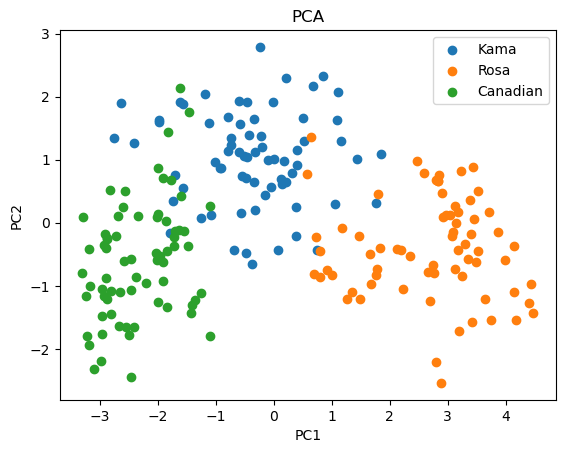

In [25]:
#Plotting of PCA
plt.scatter(X_pca[y==1, 0], X_pca[y==1, 1], label="Kama")
plt.scatter(X_pca[y==2, 0], X_pca[y==2, 1], label="Rosa")
plt.scatter(X_pca[y==3, 0], X_pca[y==3, 1], label="Canadian")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA")
plt.legend()
plt.show()

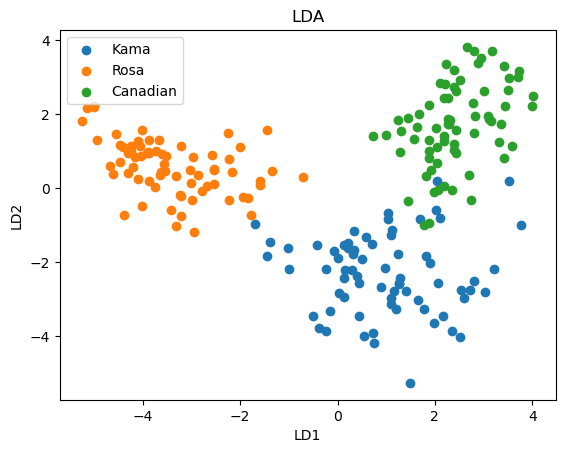

In [24]:
#Plotting of LDA
plt.scatter(X_lda[y==1, 0], X_lda[y==1, 1], label="Kama")
plt.scatter(X_lda[y==2, 0], X_lda[y==2, 1], label="Rosa")
plt.scatter(X_lda[y==3, 0], X_lda[y==3, 1], label="Canadian")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA")
plt.legend()
plt.show()

In [14]:
correlations = np.corrcoef(np.column_stack((X_std, y)), rowvar=False)
corr_with_target = correlations[:-1, -1]
feature_names = seed.columns[:-1]
sorted_features = sorted(zip(feature_names, corr_with_target), key=lambda x: abs(x[1]), reverse=True)
for feature, correlation in sorted_features:
    print(f"{feature}: {correlation:.2f}")

asymmetry_coeff: 0.58
compactness: -0.53
width_kernel: -0.42
area: -0.35
perimeter: -0.33
length_kernel: -0.26
length_kernel_groove: 0.02
